# MNIST with 1D Convolution

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [ ]:
# Load dataset and reshape it from 2D to 1D
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, x_test.shape)

width, height = 28, 28
x_train = x_train.reshape(-1, width * height, 1)
x_test = x_test.reshape(-1, width * height, 1)
print(x_train.shape, x_test.shape)


(60000, 28, 28) (10000, 28, 28)
(60000, 784, 1) (10000, 784, 1)


In [ ]:
# One hot encode the classes
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)
print(y_train.shape, y_test.shape)

# Adding Channel dim from [60000, 10] to [60000, 10, 1]
y_train = np.expand_dims(y_train, axis = 2)
y_test = np.expand_dims(y_test, axis = 2)
print(y_train.shape, y_test.shape)

# Normalize images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

(60000, 10) (10000, 10)
(60000, 10, 1) (10000, 10, 1)


In [ ]:
# Build the model

model = Sequential([
    Conv1D(filters = 128, kernel_size=3, activation="relu", input_shape=(784, 1), padding = 'same'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters = 256, kernel_size=3, activation="relu", padding = 'same'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 784, 128)            │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 392, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 392, 256)            │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 196, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,523,018 (24.88 MB)

 Trainable params: 6,523,018 (24.88 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.1030 - loss: 0.5368 - val_accuracy: 0.1019 - val_loss: 0.1203
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.1029 - loss: 0.1859 - val_accuracy: 0.1018 - val_loss: 0.0957
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.0987 - loss: 0.1422 - val_accuracy: 0.1011 - val_loss: 0.0913
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.0999 - loss: 0.1167 - val_accuracy: 0.1013 - val_loss: 0.0804
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.1011 - loss: 0.1090 - val_accuracy: 0.1022 - val_loss: 0.0903
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.1001 - loss: 0.0907 - val_accuracy: 0.1027 - val_loss: 0.0843
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.1014 - loss: 0.0808 - val_accuracy: 0.1008 - val_loss: 0.0794
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.1003 - loss: 0.0736 - 

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0960 - loss: 0.0810
Test accuracy: 10.04%


# Text Classification with TCN
* IMDB Movie Reviews Dataset.
* Task: is to classify whether it's positive or negative review.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

In [ ]:
# Step 1: Load and Preprocess the IMDB Dataset
vocab_size = 20000  # Number of unique words to consider
max_len = 200  # Maximum length of sequences
embedding_dim = 50  # Embedding dimension

# Load dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = vocab_size)

In [ ]:
print(x_train.shape)
for i in range(5):
  print(len(x_train[i]))

(25000,)
218
189
141
550
147


In [ ]:
# Pad sequences to ensure equal length
x_train = pad_sequences(x_train, maxlen=max_len, padding="post", truncating="post")
x_test = pad_sequences(x_test, maxlen=max_len, padding="post", truncating="post")

In [ ]:
print(x_train.shape)
for i in range(5):
  print(len(x_train[i]))

(25000, 200)
200
200
200
200
200


In [ ]:
# Step 2: Define the TCN Model
def build_tcn_model(vocab_size, embedding_dim, max_len, num_classes=1, kernel_size=3, num_filters=32, dilation_rates=[1, 2, 4, 8], dropout_rate=0.2):
    inputs = layers.Input(shape = (max_len,))

    # Embedding layer
    x = layers.Embedding(vocab_size, embedding_dim, input_length=max_len)(inputs)
    x = layers.SpatialDropout1D(dropout_rate)(x)

    # Temporal Convolutional Layers with Dilation
    for dilation_rate in dilation_rates:
        x = layers.Conv1D(
            filters=num_filters,
            kernel_size=kernel_size,
            dilation_rate=dilation_rate,
            padding="causal",
            activation="relu"
        )(x)
        x = layers.BatchNormalization()(x)

    # Global Average Pooling and Output
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(num_classes, activation="sigmoid")(x)

    model = models.Model(inputs, outputs)
    return model

# Build the model
model = build_tcn_model(vocab_size, embedding_dim, max_len)

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 200, 50)             │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_1                  │ (None, 200, 50)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 200, 32)             │           4,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 200, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 200, 32)             │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 200, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 200, 32)             │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 200, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 200, 32)             │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 200, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,014,689 (3.87 MB)

 Trainable params: 1,014,433 (3.87 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
# Step 3: Train the Model
batch_size = 64
epochs = 5

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=batch_size,
    epochs=epochs
)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.7402 - loss: 0.4906 - val_accuracy: 0.6462 - val_loss: 0.5592
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9338 - loss: 0.1789 - val_accuracy: 0.8360 - val_loss: 0.4028
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9751 - loss: 0.0819 - val_accuracy: 0.8477 - val_loss: 0.4396
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9859 - loss: 0.0452 - val_accuracy: 0.8485 - val_loss: 0.5564
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9899 - loss: 0.0303 - val_accuracy: 0.8393 - val_loss: 0.6708


In [ ]:
# Step 4: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8399 - loss: 0.6651
Test Accuracy: 0.8393


# Signals With TCN
* Predicting the Next Value in a Sine Wave. We'll generate a dataset where the goal is to predict the next value of a sine wave given the previous values.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
# Generate synthetic sine wave dataset
def generate_sine_wave_data(num_samples, sequence_length, noise = 0.1):
    x = np.linspace(0, num_samples * np.pi, num_samples)
    y = np.sin(x) + noise * np.random.normal(size = x.shape)  # Sine wave with noise

    # Create sequences and targets
    sequences = []
    targets = []
    for i in range(len(y) - sequence_length):
        sequences.append(y[i:i + sequence_length])
        targets.append(y[i + sequence_length])
    return np.array(sequences), np.array(targets)

In [ ]:
# Parameters for dataset
NUM_SAMPLES = 10000
SEQUENCE_LENGTH = 50
NOISE_LEVEL = 0.1

# Generate data
X, y = generate_sine_wave_data(NUM_SAMPLES, SEQUENCE_LENGTH, noise=NOISE_LEVEL)

In [ ]:
# Split into train/test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (7960, 50, 1, 1)
Testing data shape: (1990, 50, 1, 1)


In [ ]:
# Build TCN model
def build_tcn_model(input_shape, kernel_size=3, num_filters=32, dilation_rates=[1, 2, 4], dropout_rate=0.2):
    inputs = layers.Input(shape=input_shape)

    # Stack of Temporal Convolutions
    x = inputs
    for dilation_rate in dilation_rates:
        x = layers.Conv1D(
            filters=num_filters,
            kernel_size=kernel_size,
            dilation_rate=dilation_rate,
            padding="causal",
            activation="relu"
        )(x)
        x = layers.BatchNormalization()(x)

    # Global Average Pooling
    x = layers.GlobalAveragePooling1D()(x)

    # Fully Connected Layer
    outputs = layers.Dense(1)(x)  # Linear activation for regression

    model = models.Model(inputs, outputs)
    return model

In [ ]:
# Model parameters
INPUT_SHAPE = (SEQUENCE_LENGTH, 1)
KERNEL_SIZE = 3
NUM_FILTERS = 32
DILATION_RATES = [1, 2, 4]
DROPOUT_RATE = 0.2

# Build and compile the model
model = build_tcn_model(INPUT_SHAPE, KERNEL_SIZE, NUM_FILTERS, DILATION_RATES, DROPOUT_RATE)
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 50, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 50, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 50, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 50, 32)              │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 50, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 50, 32)              │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 50, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,753 (26.38 KB)

 Trainable params: 6,561 (25.63 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.1187 - mae: 0.2589 - val_loss: 0.1355 - val_mae: 0.3179
Epoch 2/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0368 - mae: 0.1534 - val_loss: 0.0570 - val_mae: 0.1827
Epoch 3/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0305 - mae: 0.1389 - val_loss: 0.0418 - val_mae: 0.1716
Epoch 4/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0310 - mae: 0.1397 - val_loss: 0.0220 - val_mae: 0.1191
Epoch 5/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0372 - mae: 0.1519 - val_loss: 0.0204 - val_mae: 0.1128
Epoch 6/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0362 - mae: 0.1513 - val_loss: 0.0175 - val_mae: 0.1046
Epoch 7/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0320 - mae: 0.1414 - val_loss: 0.0191 - val_mae: 0.1101
Epoch 8/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0334 - mae: 0.1458 - val_loss: 0.0202 - val_mae: 0.1130
Epoch 9/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - 

In [ ]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mae: 0.0962
Test Loss: 0.0178, Test MAE: 0.1063


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


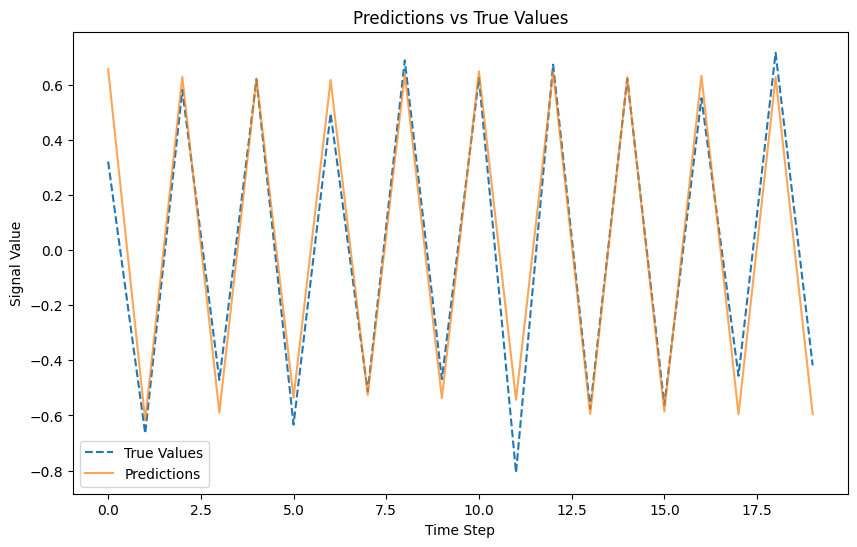

In [ ]:
# Plot predictions vs true values
plt.figure(figsize=(10, 6))
plt.plot(y_test[:20], label="True Values", linestyle='dashed')
plt.plot(y_pred[:20], label="Predictions", alpha=0.7)
plt.legend()
plt.title("Predictions vs True Values")
plt.xlabel("Time Step")
plt.ylabel("Signal Value")
plt.show()